Nama:

In [1]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

(1) Gunakan 2 training set (tanpa seleksi fitur dan dengan seleksi fitur) dan testing set yang sudah Anda buat pada hands-on 4

In [3]:
#memanggil file yang X_train yang telah ditransformasi tanpa seleksi pada hands-on sebelumnya
X_train_transformed = pd.read_csv('X_train_transformed.csv')
X_train_transformed.drop('Unnamed: 0', axis=1, inplace=True)
print(X_train_transformed.shape)
X_train_transformed.head()

(2352, 51)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.261905,0.503937,0.214286,0.50,0.333333,0.128571,0.666667,0.00,0.666667,0.122696,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.500000,0.524696,0.642857,0.75,1.000000,0.157143,0.666667,0.25,1.000000,0.152343,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.563350,0.285714,0.50,0.333333,0.328571,0.666667,0.00,1.000000,0.069352,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.023810,0.304939,0.750000,0.00,1.000000,0.285714,0.666667,0.00,0.666667,0.035071,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.428571,0.560487,0.535714,0.75,0.666667,0.185714,1.000000,0.00,0.000000,0.091311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
#memanggil X_train yang telah ditransformasi dengan seleksi
X_train_selected = pd.read_csv('X_train_selected.csv')
X_train_selected.drop('Unnamed: 0', axis=1, inplace=True)
print(X_train_selected.shape)
X_train_selected.head()

(2352, 13)


,Age,DailyRate,HourlyRate,JobInvolvement,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsSinceLastPromotion,EducationField_Human Resources,EducationField_Technical Degree,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.261905,0.503937,0.128571,0.666667,0.609958,0.666667,0.250,0.466667,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.524696,0.157143,0.666667,0.122345,1.000000,0.175,0.133333,0.0,0.0,0.0,0.0,0.0
2,0.452381,0.563350,0.328571,0.666667,0.374102,1.000000,0.100,0.066667,0.0,0.0,0.0,1.0,0.0
3,0.023810,0.304939,0.285714,0.666667,0.992813,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,1.0
4,0.428571,0.560487,0.185714,1.000000,0.247942,0.000000,0.450,1.000000,0.0,0.0,0.0,0.0,1.0


In [5]:
#memanggil X_test yang telah ditransformasi tanpa seleksi
X_test_transformed = pd.read_csv('X_test_transformed.csv')
X_test_transformed.drop('Unnamed: 0', axis=1, inplace=True)
print(X_test_transformed.shape)
X_test_transformed.head()

(588, 51)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.238095,0.798139,0.000000,0.50,0.666667,0.528571,0.666667,0.00,0.000000,0.135966,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.951324,0.464286,0.50,0.333333,0.042857,0.666667,0.00,0.666667,0.026593,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.523810,0.367931,0.035714,0.25,0.666667,0.985714,0.666667,0.00,0.000000,0.124697,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.142857,0.421618,0.785714,0.50,0.333333,0.842857,1.000000,0.00,1.000000,0.090363,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.523810,0.744452,0.250000,0.25,1.000000,0.600000,0.666667,0.25,1.000000,0.161137,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
#memanggil X_train yang telah ditransformasi dengan seleksi
X_test_selected = pd.read_csv('X_test_selected.csv')
X_test_selected.drop('Unnamed: 0', axis=1, inplace=True)
print(X_test_selected.shape)
X_test_selected.head()

(588, 13)


,Age,DailyRate,HourlyRate,JobInvolvement,MonthlyRate,StockOptionLevel,TotalWorkingYears,YearsSinceLastPromotion,EducationField_Human Resources,EducationField_Technical Degree,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.238095,0.798139,0.528571,0.666667,0.426621,0.333333,0.075,0.066667,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.951324,0.042857,0.666667,0.237864,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,1.0
2,0.523810,0.367931,0.985714,0.666667,0.944027,0.333333,0.175,0.000000,0.0,0.0,0.0,1.0,0.0
3,0.142857,0.421618,0.842857,1.000000,0.784421,0.666667,0.150,0.066667,0.0,0.0,0.0,1.0,0.0
4,0.523810,0.744452,0.600000,0.666667,0.270909,0.000000,0.200,0.133333,0.0,0.0,0.0,0.0,0.0


In [7]:
#memanggil y_test dan y_train
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_train.drop('Unnamed: 0', axis=1, inplace=True)
y_test = np.where(y_test == 'Yes', 1, 0)
y_train = np.where(y_train == 'Yes', 1, 0)

(2) Lakukan cross validation (k=5) menggunakan GridSearchCV() dengan estimator logistic regression pada kedua training set untuk menentukan hyperparameter 'penalty' dan 'C' yang optimal. <p>
Notes: dua kali melakukan cross validation: cv pertama untuk training set dengan seleksi fitur, cv kedua untuk training set tanpa seleksi fitur.

In [8]:
#menyiapkan dictionary yang berisi argumen untuk parameter yang akan dituning
params_grid = {'penalty':['l1', 'l2', 'none'], 'C':[0.5, 1, 2]}
#menyiapkan model logistic regression
logreg = LogisticRegression(random_state=42, solver='saga')
#menyiapkan fungsi grid search cross validation
gscv = GridSearchCV(logreg, param_grid=params_grid, cv=5, return_train_score=False)

In [9]:
#fitting gscv untuk training set dengan seleksi fitur
gscv.fit(X_train_selected, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': [0.5, 1, 2], 'penalty': ['l1', 'l2', 'none']})

In [10]:
#menyimpan nilai parameter terbaik model logistic regression untuk X_train dengan seleksi fitur
C_lr_selected = gscv.best_params_['C']
penalty_lr_selected = gscv.best_params_['penalty']

In [11]:
#fitting gscv untuk training set tanpa seleksi fitur
gscv.fit(X_train_transformed, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42, solver='saga'),
             param_grid={'C': [0.5, 1, 2], 'penalty': ['l1', 'l2', 'none']})

In [12]:
#menyimpan nilai parameter terbaik model logistic regression untuk X_train dengan seleksi fitur
C_lr_transformed = gscv.best_params_['C']
penalty_lr_transformed = gscv.best_params_['penalty']

In [13]:
print(dir(GridSearchCV))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', 'classes_', 'decision_function', 'fit', 'get_params', 'inverse_transform', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'score_samples', 'set_params', 'transform']


In [14]:
GridSearchCV._estimator_type

(3) Buat 2 model logistic regression. 1 Model berdasarkan training set dengan seleksi fitur, 1 Model berdasarkan training set tanpa seleksi fitur.

In [15]:
#model logistic regression untuk training set dengan seleksi fitur
logreg_selected = LogisticRegression(penalty=penalty_lr_selected, C=C_lr_selected, random_state=42, solver='saga')
#model logistic regression untuk training set tanpa seleksi fitur
logreg_transformed = LogisticRegression(penalty=penalty_lr_transformed, C=C_lr_transformed, random_state=42, solver='saga')

In [16]:
#fitting kedua model
logreg_selected.fit(X_train_selected, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, penalty='l1', random_state=42, solver='saga')

In [17]:
logreg_transformed.fit(X_train_transformed, y_train)

c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Rahman Aziz F\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')

(4) Plot ROC-AUC curve dan precision-recall curve untuk kedua model. Tentukan threshold optimal untuk model yang telah Anda buat. 1 Model 1 threshold.

In [19]:
#menyimpan nilai probabilitas kasus positif predicted untuk X_train_selected dan X_train_transformed
y_train_selected_pred = logreg_selected.predict_proba(X_train_selected)[:,1]
y_train_transformed_pred = logreg_transformed.predict_proba(X_train_transformed)[:,1]
#mengekstrak nilai FPR dan TPR untuk setiap threshold dengan fungsi roc_curve
fpr_sel, tpr_sel, thr_sel = roc_curve(y_train, y_train_selected_pred)
fpr_tr, tpr_tr, thr_tr = roc_curve(y_train, y_train_transformed_pred)

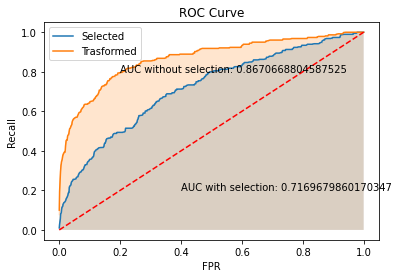

In [20]:
#membuat ROC-AUC plot
sns.lineplot(x = fpr_sel, y = tpr_sel, label='Selected')
sns.lineplot(x = fpr_tr, y = tpr_tr, label='Trasformed')
plt.plot([0, 1], [0,1], color='red', linestyle='--')
plt.fill_between(fpr_sel, 0, tpr_sel, alpha=0.2)
plt.fill_between(x=fpr_tr, y1=0, y2 = tpr_tr, alpha=0.2)
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.annotate('AUC with selection: {}'.format(roc_auc_score(y_train, y_train_selected_pred)), xy=(0.4,0.2))
plt.annotate('AUC without selection: {}'.format(roc_auc_score(y_train, y_train_transformed_pred)), xy=(0.2,0.8))
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
#menyimpan threshold optimum untuk masing-masing model yang diperoleh dari ROC Curve
thre_roc_sel = thr_sel[np.argmax((1-fpr_sel)*tpr_sel)]
thre_roc_tr = thr_tr[np.argmax((1-fpr_tr)*tpr_tr)]

In [22]:
#precision-recall curve
precision_sel, recall_sel, thre_prc_sel = precision_recall_curve(y_train, y_train_selected_pred)
precision_tr, recall_tr, thre_prc_tr = precision_recall_curve(y_train, y_train_transformed_pred)

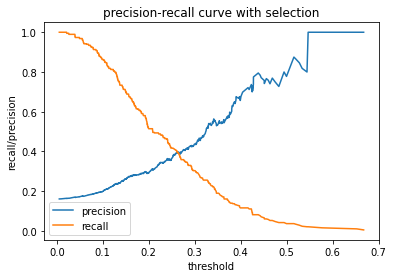

In [23]:
sns.lineplot(x = thre_prc_sel, y=precision_sel[:-1], label='precision')
sns.lineplot(x = thre_prc_sel, y=recall_sel[:-1], label='recall')
plt.xlabel('threshold')
plt.ylabel('recall/precision')
plt.title('precision-recall curve with selection')
plt.show()

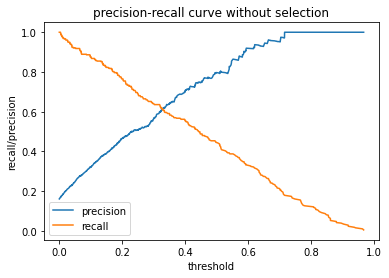

In [24]:
sns.lineplot(x = thre_prc_tr, y=precision_tr[:-1], label='precision')
sns.lineplot(x = thre_prc_tr, y=recall_tr[:-1], label='recall')
plt.xlabel('threshold')
plt.ylabel('recall/precision')
plt.title('precision-recall curve without selection')
plt.show()

In [25]:
#threshold optimum yang diperoleh dari precision-recall curve
threshold_pr_sel = thre_prc_sel[np.argmax(recall_sel*precision_sel)]
threshold_pr_tr = thre_prc_tr[np.argmax(recall_tr*precision_tr)]

In [46]:
thre_prc_sel[recall_sel[:-1] == precision_sel[:-1]]

array([0.26231352])

In [47]:
thre_prc_tr[recall_tr[:-1] == precision_tr[:-1]]

array([0.32746401])

(5) Tampilkan classification report untuk membandingkan performance training set dan testing set untuk model 1 dan model 2.

In [49]:
#model 1, dengan seleksi fitur
y_train_selected_pred = logreg_selected.predict_proba(X_train_selected)[:,1] > 0.26
print(classification_report(y_train, y_train_selected_pred))
y_test_selected_pred = logreg_selected.predict_proba(X_test_selected)[:,1] > 0.26
print(classification_report(y_test, y_test_selected_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1973
           1       0.39      0.40      0.40       379

    accuracy                           0.80      2352
   macro avg       0.64      0.64      0.64      2352
weighted avg       0.81      0.80      0.80      2352

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       493
           1       0.42      0.41      0.41        95

    accuracy                           0.81       588
   macro avg       0.65      0.65      0.65       588
weighted avg       0.81      0.81      0.81       588



In [48]:
#model 2, tanpa seleksi fitur
y_train_transformed_pred = logreg_transformed.predict_proba(X_train_transformed)[:,1] > 0.33
print(classification_report(y_train, y_train_transformed_pred))
y_test_transformed_pred = logreg_transformed.predict_proba(X_test_transformed)[:,1] > 0.33
print(classification_report(y_test, y_test_transformed_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1973
           1       0.62      0.61      0.61       379

    accuracy                           0.88      2352
   macro avg       0.77      0.77      0.77      2352
weighted avg       0.88      0.88      0.88      2352

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       493
           1       0.61      0.65      0.63        95

    accuracy                           0.88       588
   macro avg       0.77      0.79      0.78       588
weighted avg       0.88      0.88      0.88       588



(6) Tuliskan kesimpulannya. Apakah terjadi overfit? Apakah seleksi fitur meningkatkan performance?

Berdasarkan AUC score, performa model tanpa seleksi fitur lebih baik dibandingkan model dengan seleksi fitur sehingga disimpulkan bahwa seleksi fitur tidak meningkatkan performance. Model pertama (dengan seleksi) underfit karena memiliki nilai recall dan precision yang rendah. Model kedua (tanpa seleksi) lebih baik, namun nilai precision 1 nya masih rendah.